In [4]:
from scipy.io import loadmat
import numpy as np
from matplotlib import pyplot as plt

import scipy.stats as stats
import math

In [5]:
annots=loadmat('363A3Q1.mat')

# (b)

In [62]:
t=np.array(annots['t']).T
y=np.array(annots['y']).T
ones=np.ones(t.size).T


In [68]:
A=np.vstack((ones,t,np.exp(-2*t))).T
A

array([[1.        , 0.        , 1.        ],
       [1.        , 0.05      , 0.90483742],
       [1.        , 0.1       , 0.81873075],
       [1.        , 0.15      , 0.74081822],
       [1.        , 0.2       , 0.67032005],
       [1.        , 0.25      , 0.60653066],
       [1.        , 0.3       , 0.54881164],
       [1.        , 0.35      , 0.4965853 ],
       [1.        , 0.4       , 0.44932896],
       [1.        , 0.45      , 0.40656966],
       [1.        , 0.5       , 0.36787944],
       [1.        , 0.55      , 0.33287108],
       [1.        , 0.6       , 0.30119421],
       [1.        , 0.65      , 0.27253179],
       [1.        , 0.7       , 0.24659696],
       [1.        , 0.75      , 0.22313016],
       [1.        , 0.8       , 0.20189652],
       [1.        , 0.85      , 0.18268352],
       [1.        , 0.9       , 0.16529889],
       [1.        , 0.95      , 0.14956862],
       [1.        , 1.        , 0.13533528]])

In [70]:
np.matmul(A.T,A)

array([[21.        , 10.5       ,  9.22151915],
       [10.5       ,  7.175     ,  3.03290982],
       [ 9.22151915,  3.03290982,  5.43393013]])

In [71]:
AT_A=np.matmul(A.T,A)
AT_Y=np.matmul(A.T,y.T)
x_LS=np.matmul(np.linalg.inv(AT_A),AT_Y)
x_LS

array([[ 3.13093964],
       [-1.01907675],
       [ 1.87495549]])

In [72]:
#Check the shape of our matrices
x_LS.shape
A.shape

(21, 3)

In [73]:
r=y.T-np.matmul(A,x_LS)
r

array([[ 0.04787159],
       [ 0.16654765],
       [-0.25253886],
       [ 0.05077446],
       [-0.01142792],
       [-0.18109595],
       [-0.09994993],
       [-0.02790506],
       [ 0.29071688],
       [ 0.20542791],
       [-0.21038865],
       [ 0.22466862],
       [-0.00929048],
       [-0.09076664],
       [-0.01527603],
       [-0.10922748],
       [-0.10284662],
       [ 0.05708893],
       [ 0.0478026 ],
       [ 0.04760525],
       [-0.02779024]])

In [74]:
r=y.T-np.matmul(A,x_LS)
sigmaSquare=np.sum(r**2)/(21-3)

In [75]:
gamma_LS=sigmaSquare*np.linalg.inv(AT_A)

In [78]:
#Check Answer Using Package Function
np.linalg.lstsq(A,y.T)[0]


C:\Users\5CD94928JO\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


array([[ 3.13093964],
       [-1.01907675],
       [ 1.87495549]])

# (c)

In [79]:
def prediction(t):
    V=np.array([1,t,np.exp(-2*t)])
    prediction=np.matmul(V,x_LS)
    return prediction

def predictionStDev(t):
    V=np.array([1,t,np.exp(-2*t)])
    StDev=np.matmul(np.matmul(V,gamma_LS),V.T)**0.5
    return StDev


In [80]:
#Three Standard Deviation Intervals
np.array([prediction(1.5)-3*predictionStDev(1.5),prediction(1.5)+3*predictionStDev(1.5)])

array([[0.97405332],
       [2.4172928 ]])

In [81]:
x_LS[1]
# gamma_LS[0,0]

array([-1.01907675])

# (d)

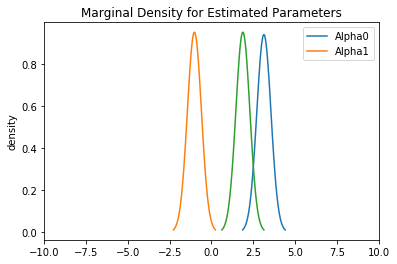

In [82]:
#Alpha0
mu0 = x_LS[0]
variance0 = gamma_LS[0,0]
sigma0 = math.sqrt(variance0)
x = np.linspace(mu0 - 3*sigma0, mu0 + 3*sigma0, 100)
plt.plot(x, stats.norm.pdf(x, mu0, sigma0))
plt.xlim(-10,10)

#Alpha1
mu1 = x_LS[1]
variance1 = gamma_LS[1,1]
sigma1 = math.sqrt(variance1)
x = np.linspace(mu1 - 3*sigma1, mu1 + 3*sigma1, 100)
plt.plot(x, stats.norm.pdf(x, mu1, sigma1))

#Alpha3
mu2 = x_LS[2]
variance2 = gamma_LS[1,1]
sigma2 = math.sqrt(variance2)
x = np.linspace(mu2 - 3*sigma2, mu2 + 3*sigma2, 100)
plt.plot(x, stats.norm.pdf(x, mu2, sigma2))



#Format our plot
plt.title("Marginal Density for Estimated Parameters")
plt.ylabel("density")
plt.legend(['Alpha0','Alpha1'])

In [83]:
#Generate values for plotting our prediction interval
tvalues=np.linspace(start=0,stop=2,num=41)
ypredline=np.array([prediction(t) for t in tvalues])
ypredUpperInterval=np.array([prediction(t) + 3*predictionStDev(t) for t in tvalues])
ypredLowerInterval=np.array([prediction(t) - 3*predictionStDev(t) for t in tvalues])

Text(0, 0.5, 'y')

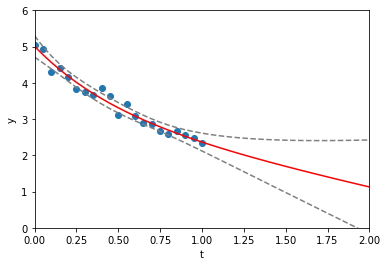

In [84]:
#Plot our Observed t and y values
plt.scatter(t,y)

#Plot our Predictions
plt.plot(tvalues,ypredline,color='red')
plt.plot(tvalues,ypredUpperInterval,color='grey',linestyle='--')
plt.plot(tvalues,ypredLowerInterval,color='grey',linestyle='--')

#Format Our Plot
plt.xlim(0,2)
plt.ylim(0,6)
plt.xlabel("t")
plt.ylabel("y")

# (e)